# Jupyter Notebooks - Astronomy Images - `astropy`


This build contains several demonstrations of using Jupyter notebooks to work with and display astronomical data.

This includes rendering ??standard formats in astronomy?? and astronomical maps.

From the *Cell* menu, select *Run All*.

## `astropy`

The `astropy` package provides a range of tools for working with astronomical image files.

Examples taken from:

- http://eso-python.github.io/ESOPythonTutorials/FITS-images.html

In [1]:
from astropy.utils.data import download_file
from astropy.io import fits

horsehead_url = 'http://data.astropy.org/tutorials/FITS-images/HorseHead.fits'
image_file = download_file(horsehead_url, cache=True )

hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/jovyan/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


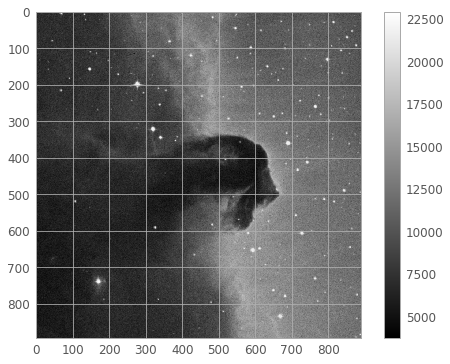

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Nice styling
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


image_data = fits.getdata(image_file)

plt.imshow(image_data, cmap='gray')
plt.colorbar();

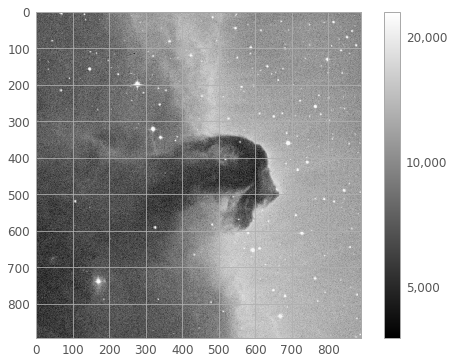

In [3]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000']);

INFO: Auto-setting vmin to  3.634e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.940e+04 [aplpy.core]


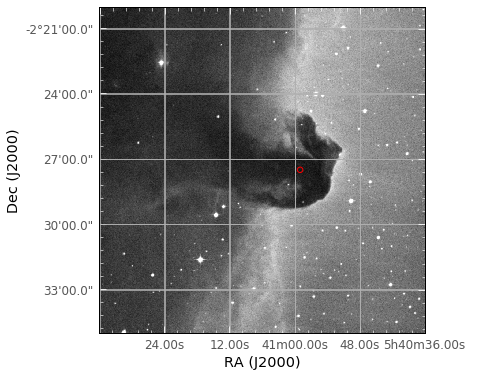

In [4]:
import aplpy
from astropy import coordinates

F = aplpy.FITSFigure(hdu_list[0], figure=plt.figure(1))
F.show_grayscale()

# Can use world coordinates directly
horsehead = coordinates.SkyCoord.from_name('Horsehead Nebula')
F.show_markers(horsehead.ra.deg, horsehead.dec.deg)